Necessary Imports and Data reading from link

In [0]:
#Necessary Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

#Data reading from link
boardGameData= pd.read_csv('https://raw.githubusercontent.com/ThaWeatherman/scrapers/master/boardgamegeek/games.csv')
print(boardGameData.head())

       id       type  ... total_weights  average_weight
0   12333  boardgame  ...          2562          3.4785
1  120677  boardgame  ...          1423          3.8939
2  102794  boardgame  ...           777          3.7761
3   25613  boardgame  ...          1642          4.1590
4    3076  boardgame  ...          5213          3.2943

[5 rows x 20 columns]


Description about data

In [0]:
#Description about data
print(boardGameData.describe())
print(boardGameData.shape)

                  id  yearpublished  ...  total_weights  average_weight
count   81312.000000   81309.000000  ...   81312.000000    81312.000000
mean    72278.150138    1806.630668  ...      16.488009        0.908083
std     58818.237742     588.517834  ...     115.980285        1.176002
min         1.000000   -3500.000000  ...       0.000000        0.000000
25%     21339.750000    1984.000000  ...       0.000000        0.000000
50%     43258.000000    2003.000000  ...       0.000000        0.000000
75%    128836.500000    2010.000000  ...       2.000000        1.916700
max    184451.000000    2018.000000  ...    5996.000000        5.000000

[8 rows x 18 columns]
(81312, 20)


Preprocessing (Removing unwanted values)

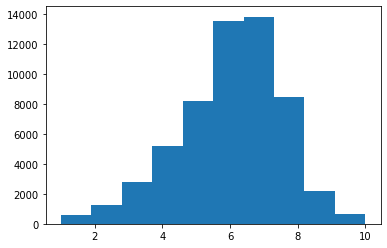

In [0]:
games=boardGameData

# Remove any rows without user reviews.
games = games[games["users_rated"] > 0]

# Remove any rows with missing values.
games = games.dropna(axis=0)

#Removes any columns with missing values
# games = games.dropna(axis=1)

# Make a histogram of all the ratings in the average_rating column.
plt.hist(games["average_rating"])

# Show the plot.
plt.show()

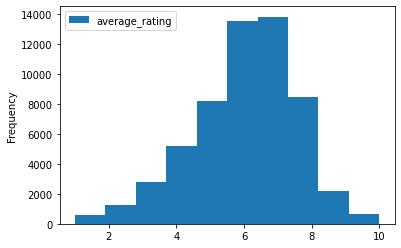

In [0]:
games[['average_rating']].plot(kind='hist')
plt.show()

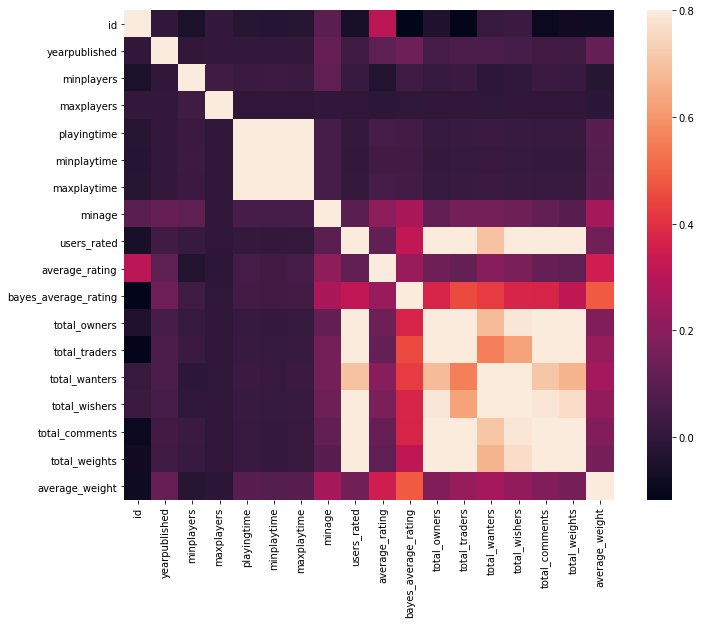

In [0]:
#correlation matrix
corrmat = games.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

Preparing data for training and testing

In [0]:
#features and labels
X=games[ [ c for c in columns if c not in ["bayes_average_rating", "average_rating", "type", "name", "id"] ] ]
y=games["average_rating"]

#Split into test and train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

# Print the shapes of both sets.
print(X_train.shape)
print(X_test.shape)

(45515, 15)
(11379, 15)


Linear regression

In [0]:
# Initialize the model class.
model = LinearRegression()

# Fit the model to the training data.
model.fit(X_train, y_train)

# Generate our predictions for the test set.
predictions = model.predict(X_test)

# Compute error between our test predictions and the actual values.
mean_squared_error(predictions, y_test)

2.0878654278597417

Random Forest

In [0]:
# Initialize the model with some parameters.
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
# Fit the model to the data.
model.fit(X_train, y_train)
# Make predictions.
predictions = model.predict(X_test)
# Compute the error.
mean_squared_error(predictions, y_test)


1.4575588917181705